In [1]:
# BMI 데이터를 이용해서 Multinomial Classification을 구현해 보아요!
# sklearn과 tensorflow를 이용해서 구현할 꺼예요!
%reset

# 필요한 module import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
# Raw Data Loading
df = pd.read_csv('bmi.csv',
                 skiprows=3)
# display(df.head(), df.shape)  # (20000, 3)

# 결측치 확인 및 처리
# print(df.isnull().sum())  # 결측치는 없어요!

# 이상치 확인!
zscore = 1.8
df.loc[np.abs(stats.zscore(df['height'])) >= zscore]  # height의 이상치 처리
df.loc[np.abs(stats.zscore(df['weight'])) >= zscore]  # weight의 이상치 처리
df.loc[np.abs(stats.zscore(df['label'])) >= zscore]  # label의 이상치 처리

x_data = df[['height', 'weight']].values   # 2차원 matrix
t_data = df['label'].values                 # 1차원

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분할
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 stratify=t_data,
                 test_size=0.3,
                 random_state=0)

In [3]:
# sklearn으로 모델 학습하고 평가를 진행!

sklearn_model = linear_model.LogisticRegression()

sklearn_model.fit(x_data_train_norm,
                  t_data_train)

predict_value = sklearn_model.predict(x_data_test_norm)
# 평가는 accuracy로 평가할 꺼예요!
result = accuracy_score(t_data_test,predict_value)
print(result)

# prediction 예측 해보기
height = 187
weight = 80
my_state = np.array([[height,weight]])
my_result = sklearn_model.predict(scaler.transform(my_state))
print(my_result) # [1] 표준이에요!
import os

os.environ["CUDA_VISIBLE_DEVICES"]="0"


0.9855
[1]


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # 텐서플로가 첫 번째 GPU에 1GB 메모리만 할당하도록 제한
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)])
  except RuntimeError as e:
    # 프로그램 시작시에 가상 장치가 설정되어야만 합니다
    print(e)
keras_model = Sequential()

keras_model.add(Flatten(input_shape=(2,)))
keras_model.add(Dense(units=3,
                      activation = 'softmax'))
keras_model.compile(optimizer = Adam(learning_rate = 1e-2),
                    loss = 'sparse_categorical_crossentropy',
                    metrics = ['acc'])
keras_model.fit(x_data_train_norm,
                t_data_train,
                epochs=200,
                verbose = 1,
                validation_split = 0.2)
#loss: 0.0633 - acc: 0.9817 - val_loss: 0.0558 - val_acc: 0.9818
#gpu 2m16.7
#cpu 1m12.3

Epoch 1/200
350/350 [==============================] - 2s 2ms/step - loss: 0.7426 - acc: 0.7483 - val_loss: 0.5845 - val_acc: 0.8432
Epoch 2/200
350/350 [==============================] - 1s 2ms/step - loss: 0.5291 - acc: 0.8598 - val_loss: 0.4585 - val_acc: 0.9061
Epoch 3/200
350/350 [==============================] - 1s 2ms/step - loss: 0.4362 - acc: 0.9055 - val_loss: 0.3884 - val_acc: 0.9400
Epoch 4/200
350/350 [==============================] - 1s 2ms/step - loss: 0.3787 - acc: 0.9322 - val_loss: 0.3415 - val_acc: 0.9586
Epoch 5/200
350/350 [==============================] - 1s 2ms/step - loss: 0.3377 - acc: 0.9521 - val_loss: 0.3061 - val_acc: 0.9704
Epoch 6/200
350/350 [==============================] - 1s 2ms/step - loss: 0.3073 - acc: 0.9624 - val_loss: 0.2792 - val_acc: 0.9768
Epoch 7/200
350/350 [==============================] - 1s 2ms/step - loss: 0.2832 - acc: 0.9685 - val_loss: 0.2580 - val_acc: 0.9743
Epoch 8/200
350/350 [==============================] - 1s 2ms/step - 

In [5]:
# evaluation

model_eval = keras_model.evaluate(x_data_test_norm,
                                  t_data_test)
print(model_eval)
#[0.05780763924121857, 0.98416668176651] loss값, 정확도

# prediction 예측 해보기
height = 187
weight = 80
my_state = np.array([[height,weight]])
#my_result = keras_model.predict(scaler.transform(my_state))
#print(my_result) # [1] 표준이에요!
#[[1.8506222e-07 9.9517584e-01 4.8239622e-03]]

print(gpus)
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

188/188 [==============================] - 0s 1ms/step - loss: 0.0571 - acc: 0.9855
[0.057092249393463135, 0.9854999780654907]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15759734402028125941
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4294967296
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3991966533605619749
physical_device_desc: "device: 0, name: GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
]


In [6]:
# 다른 예제를 구현해 보아요! (Iris-붓꽃예제, MNIST-손글씨숫자예제)
# 추가적으로 유용한 함수하나 소개할꺼예요!
# 지금까지 우리가 evaluation할때 accuracy만 구했어요!
# 그런데 사실 precision, recall, f1과 같은 평가지표도 많이 사용되요!
# 이런 평가지표를 한방에 계산해주는 library(함수)가 있어요!
# 예제로 알아보아요!

from sklearn.metrics import classification_report

t_true = [0, 1, 2, 2, 2]
t_pred = [0, 0, 2, 2, 1]

label_names = ['thin', 'normal', 'fat']

print(classification_report(t_true, t_pred, target_names=label_names))
#precision 우리 모델이 True로 분류한 것 중에 정말로 True 인 것 예측데이터 기준
#recall true데이터 기준 True로 분류한 것 중에 정말로 True 인 것
# support 작업 수


              precision    recall  f1-score   support

        thin       0.50      1.00      0.67         1
      normal       0.00      0.00      0.00         1
         fat       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



In [7]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.datasets import load_iris

iris = load_iris()

# print(iris.data)  # x_data, 즉, 꽃받침의 길이와 너비, 꽃잎의 길이와 너비
# print(iris.feature_names)
# ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# print(iris.target)

df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# display(df)

# 혹시 결측치가 존재하나요?  - 결측치는 존재하지 않아요!
df.isnull().sum()

df['target'] = iris.target

# 중복행이 있을 수 있어요! 중복데이터가 있을 수 있어요!
df.duplicated().sum()  # 중복행이 존재하면 숫자로 알려줘요!
df = df.drop_duplicates()

# display(df.corr())  # DataFrame을 이용한 상관관계분석

# display(df)

x_data = df.drop('target', axis=1, inplace=False).values
t_data = df['target'].values

# 이상치 체크도 해야해요.. 원래는 해야해요!
# 정규화 처리를 해야 해요!

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=1)



In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# 데이터셋이 준비되었으면 우리 Tensorflow Keras를 이용해서
# Multinomial Classification을 구현하고
# 모델 평가까지 진행해 보아요!

# 모델의 정확도까지 출력해보세요!
# 개별적으로 작성해 보세요!

keras_model = Sequential()

keras_model.add(Flatten(input_shape=(4,)))
keras_model.add(Dense(units=3,
                      activation='softmax'))

keras_model.compile(optimizer=Adam(learning_rate=1e-1),
                    loss='sparse_categorical_crossentropy',
                    metrics=['acc'])

# history객체에 각 epoch당 발생되는 loss, acc, val_loss, val_acc를 저장
history = keras_model.fit(x_data_train_norm,
                          t_data_train,
                          epochs=500,
                          verbose=1,
                          validation_split=0.2)
#loss: 0.0862 - acc: 0.9398 - val_loss: 0.0339 - val_acc: 1.0000


Epoch 1/500
3/3 [==============================] - 0s 50ms/step - loss: 1.0326 - acc: 0.3855 - val_loss: 0.9737 - val_acc: 0.6190
Epoch 2/500
3/3 [==============================] - 0s 9ms/step - loss: 0.8711 - acc: 0.6627 - val_loss: 0.8985 - val_acc: 0.6667
Epoch 3/500
3/3 [==============================] - 0s 8ms/step - loss: 0.7884 - acc: 0.6627 - val_loss: 0.7963 - val_acc: 0.6667
Epoch 4/500
3/3 [==============================] - 0s 9ms/step - loss: 0.6828 - acc: 0.6627 - val_loss: 0.6604 - val_acc: 0.6667
Epoch 5/500
3/3 [==============================] - 0s 8ms/step - loss: 0.6186 - acc: 0.8313 - val_loss: 0.5710 - val_acc: 1.0000
Epoch 6/500
3/3 [==============================] - 0s 9ms/step - loss: 0.5788 - acc: 0.9157 - val_loss: 0.5184 - val_acc: 0.9524
Epoch 7/500
3/3 [==============================] - 0s 9ms/step - loss: 0.5275 - acc: 0.9036 - val_loss: 0.4996 - val_acc: 0.7619
Epoch 8/500
3/3 [==============================] - 0s 9ms/step - loss: 0.4994 - acc: 0.8193 - va

In [9]:
# Model Evaluation
print(keras_model.evaluate(x_data_test_norm,
                           t_data_test))

2/2 [==============================] - 0s 2ms/step - loss: 0.0661 - acc: 0.9778
[0.06606516987085342, 0.9777777791023254]


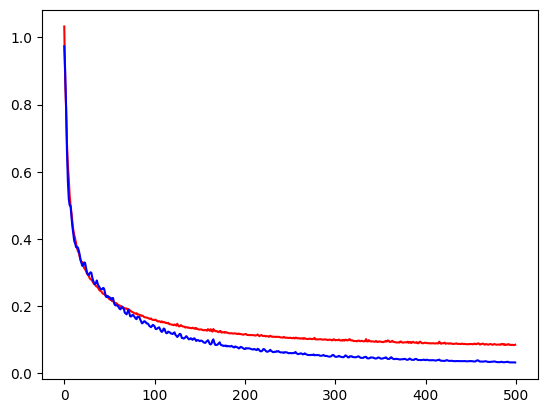

In [10]:
# 모델이 overfitting이 발생하는지 확인
# 시각화

history.history.keys()
plt.plot(history.history['loss'],color = 'r')
plt.plot(history.history['val_loss'],color = 'b')
plt.show()